# 5.1.4 Linear Regression

This notebook describes and implements linear regression.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Predict

In [2]:
def predict(w, b, x):
    """ A method that runs our linear model
    w : np.ndarray (n, 1)
        A weight matrix which will be fit to the data
    b : float (1, 1)
        The bias unit for our linear model
    x : np.ndarray (m, n)
        An input example for which we would like to predict a y value
    """
    y_pred = w @ x + b
    return y_pred

### Cost Function

In [3]:
def cost(y, y_pred):
    """
    y : np.ndarray (m, 1)
        The ground truth results
    y_pred : np.ndarray (m, 1)
    """
    m, _ = y.shape
    squared_error = np.sum((y_pred - y) ** 2)
    mean_squared_error = float(squared_error / m)
    return mean_squared_error

### Initialize Parameters

In [4]:
def initialize_parameters(n):
    return np.zeros((1, n)), 0.0

### Gradient

In [5]:
def gradient(x, y, y_pred):
    m, n = x.shape
    dw = np.sum((y_pred - y) * x) / n
    db = np.sum((y_pred - y)) / n
    return dw, db

### Gradient Descent

In [6]:
def gradient_descent(x, y, w, b, epochs=1000, learning_rate=0.0025):
    m, n = x.shape
    
    for i in range(epochs):
        y_pred = predict(w, b, x)
        
        if not i % 1000:
            print('epoch #' + str(i), cost(y, y_pred))
        
        dw, db = gradient(x, y, y_pred)
        
        w -= learning_rate * dw
        b -= learning_rate * db
        
    return w, b

### Plot

In [7]:
def plot(x, y, y_pred):
    m, n = x.shape
    if m == 1:
        plt.scatter(x, y)
        plt.plot(x[0], y_pred[0])
        plt.show()

# TODO: implement 3D printing, currently not plotting properly
def plot3D(x, y, w, b):
    m, n = x.shape
    x1, x2 = np.meshgrid(x[0].reshape(1, n), x[1].reshape(1, n))
    y_pred = np.zeros(x1.shape)
    for m in range(x1.shape[1]):
        x1i = x1[m,:].reshape(1, x1.shape[0])
        x2i = x2[m,:].reshape(1, x1.shape[0])
        
        xi = np.concatenate((x1i, x2i), axis=0)
        y_predi = predict(w, b, xi)
        y_pred[m,:] = y_predi

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[0], x[1], y)
    ax.plot_surface(x1, x2, y_pred, alpha=1.0)

### Model

In [8]:
def model(x, y, epochs=10000, learning_rate=0.0025, show=True):
    # retrieve the shape of x
    m, n = x.shape
    
    # initialize w and b to vectors with the appropiate dimensions (zero-valued)
    w, b = initialize_parameters(m)
    
    # run gradient descent to optomize w and b for x and y
    w, b = gradient_descent(x, y, w, b, epochs=epochs, learning_rate=learning_rate)
    
    print('w:', w)
    print('b:', b)
    print('cost:', cost(y, predict(w, b, x)))
    
    # if show is True and x is 1 dimensional
    if show and m == 1:
        # plot a line with the scatter plot
        y_pred = predict(w, b, x)
        plot(x, y, y_pred)
    
    # if show is true and x is 2 dimensional
    if show and m == 2:
        plot3D(x, y, w, b)
    

### Test

epoch #0 4915.740733973973
epoch #1000 4893.830588305251
epoch #2000 4893.80755898158
epoch #3000 4893.807402667344
epoch #4000 4893.807401603042
epoch #5000 4893.8074015957945
epoch #6000 4893.807401595746
epoch #7000 4893.807401595745
epoch #8000 4893.807401595746
epoch #9000 4893.807401595746
w: [[-0.08903122 -0.08903122]]
b: -0.0542106159271898
cost: 4893.807401595745


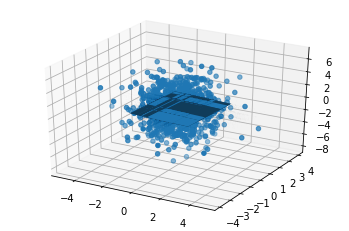

In [9]:
num_samples = 1000

# The desired mean values of the sample.
mu = np.array([0.0, 0.0, 0.0])

# The desired covariance matrix.
r = np.array([
        [  1.0, 0.75, 0.0],
        [  0.75,  1.50, 0.0],
        [  0.0,   0.0,  5.0]
    ])

# Generate the random samples.
y = np.random.multivariate_normal(mu, r, size=num_samples)

x = y[:, 0:2].reshape(2, num_samples)
y = y[:, 2].reshape(1, num_samples)


model(x, y)